Author: Group E <br>
Date: 2021-03-06 <br>
Licence: MIT License <br>

# Group E Assignment - Bike Sharing Prediction
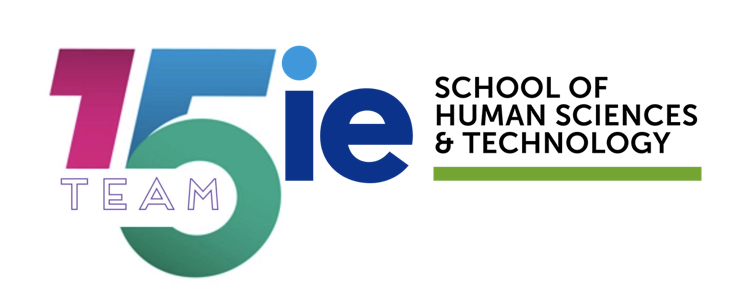

### Table of Contents:
1. Introduction
2. Exploratory Data Analysis
3. Data Engineering
4. Data Visualization
5. ML Predictive Analytics
6. Conclusion

## 1.Introduction
This notebook is analyzing the bike sharing industry in the United States of America. This report will focus on extracting value by doing an exploratory data analysis, in order to ensure data quality and give meaningful insights. Then, it will look at the missing values and outliers, which will be handled accordingly. Finally, it will start creating predictive machine learning models to see when it would be best to use this new innovative platform for daily commutes and leisure. This shall provide bike sharing companies with useful insights in regards to future strategies for special days (ie. holidays) or special seasons (winter).

In [1]:
# importing IPython relevant libraries
from IPython.display import Image
from IPython.core.display import HTML

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# insert image
Image(url= "https://images.unsplash.com/photo-1530818021323-3d2bf2af7a87?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1000&q=80")

### 1.1 Feature descriptions:
The features present in this report are defined as follows:
* **instant**: record index
* **dteday**: date
* **hr**: hour (0 to 23)
* **weathersit**: Weather situation
* **temp**: Normalized temperature in Celsius. The values are divided to 41 (max)
* **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* **hum**: Normalized humidity. The values are divided to 100 (max)
* **windspeed**: Normalized wind speed. The values are divided to 67 (max)
* **casual**: count of casual users
* **registered**: count of registered users
* **cnt**: count of total rental bikes including both casual and registered

## 2. Exploratory Analysis
### 2.1 Setting up the Environment
1. Importing the most important libraries, 'pandas' and 'numpy'. 
2. The dataset is imported and stored as 'df'
3. 'instant' is set as the index column of our dataset. 
4. A few lines of code including the following are run to explore the dataset. <br>
    a. __Head()__ <br>
    b. __Tail()__<br>
    c. __describe()__<br>
    d. __df.dtypes__ (checking if all the columns are in the data type we need) <br>
    e. __index.is_unique__ (To check if the index, 'passengerId' is unique) <br>
    f. __index.is_monotonic_increasing__ (To check if the index, 'passengerId' is incresaing in a monotonic manner.

In [2]:
# importing data wrangling and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
#!{sys.executable} -m pip3 install holidays
import holidays
import datetime
import seaborn as sns
from ipywidgets import interact
import matplotlib.dates as mdates

# importing preprocessing libraries
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, Normalizer, normalize, MinMaxScaler, RobustScaler, StandardScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import r2_score, confusion_matrix
from sklearn import set_config

# importing machine learning components
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# importing the dataset with correct index column and parsing the dates:
df = pd.read_csv("hour.csv", index_col="instant", parse_dates=["dteday"]) #parse dates
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# checking the bottom of the data set
df.tail()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,22,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
# checking the summary statistics of the data set
df.describe()

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,35.676218,153.786869,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
print("Column data types:")
df.dtypes

Column data types:


dteday        datetime64[ns]
hr                     int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [7]:
# checking for monotonicity
print("Is the index increasing monotonically?")
print(df.index.is_monotonic_increasing)
print("Is the index unique?")
print(df.index.is_unique)

Is the index increasing monotonically?
True
Is the index unique?
True


In [8]:
# counting nan values
count_nan = len(df) - df.count()
count_nan

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

In [9]:
# defining a constant seed to be able to replicate same conditions:
seed=120

## 3. Data Engineering

### 3.1: Creating columns for year, month, weekday and season. 
Seasons were defined as follows: 
- Winter: Dec - Feb (1)
- Spring: Mar - May (2)
- Summer: Jun - Aug (3)
- Autumn: Sep - Nov (4)

In [10]:
# parsing the date info into new columns for year, month and weekday respectively
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month
df['weekday'] = pd.DatetimeIndex(df['dteday']).weekday
df['season'] = df.month%12 // 3 + 1   # ARE WE SURE THIS IS CORRECT?
df.tail()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,weekday,season
instant,,,,,,,,,,,,,,
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119,2012,12,0,1
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89,2012,12,0,1
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90,2012,12,0,1
17378,2012-12-31,22,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61,2012,12,0,1
17379,2012-12-31,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.65,0.1343,12,37,49,2012,12,0,1


### 3.2: Creating binary columns
It is important to differentiate amongst some daily trends: 
- holiday (1) vs regular day (0), 
- weekday (1) vs weekend (0),
- rush hour (1) vs normal hour (0)

#### 3.2.2 Creating binary columns for holidays: is_holiday

In [11]:
# composing a holiday list and running the list with a for loop to grasp individual holidays in the given time frame 
holidays_list = []
for date in holidays.UnitedStates(years=[2011, 2012]).items():
    holidays_list.append(str(date[0]))

In [12]:
print("Special days for the US:")
print(holidays_list, end=',')

Special days for the US:
['2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25'],

In [13]:
# create the new column as is_holiday according to dteday
df['is_holiday'] = np.where(df['dteday'].isin(holidays_list), 1, 0)

#### 3.2.3 Creating binary column for weekday: is_weekday

In [14]:
# create the new column as is_weekday according to weekday
df['is_weekday'] = np.where(df['weekday'].isin([5, 6]), 0, 1)

#### 3.2.4 Creating binary column for rush hours: is_rushhour

In [15]:
# create the new column as is_rushhour according to hr
df['is_rushhour'] = np.where(df['hr'].isin([7, 8, 12, 13, 14, 15, 16, 17, 18, 19]), 1, 0)

In [16]:
df

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,weekday,season,is_holiday,is_weekday,is_rushhour
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16,2011,1,5,1,1,0,0
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40,2011,1,5,1,1,0,0
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32,2011,1,5,1,1,0,0
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13,2011,1,5,1,1,0,0
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1,2011,1,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119,2012,12,0,1,0,1,1
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89,2012,12,0,1,0,1,0
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90,2012,12,0,1,0,1,0


### 3.4 Dropping casual and registered columns 
These columns are irrelevant in the context of the study at hand

In [17]:
df = df.drop(['casual', 'registered'], axis=1)

### 3.5 Null value treatment
It is observable that 100 out of almost 18.000 rows are having null and nan values. The simplest and most machine learning way to impute such values is with the simpleimputer, which you can find in 5. ML Predictive Analytics in this report.

## 4. Visualizing Dataframe
For better theming sns.set was applied:

In [18]:
sns.set()

### 4.1 Correlation Analysis

Rides have a relatively high correlation with hr(0.39, temp 0.41 and hum(-0.32). Windspeed on the other hand is not a huge determinent. It is also notable: there is a high correlation between atemp and temp (actual vs feels like).

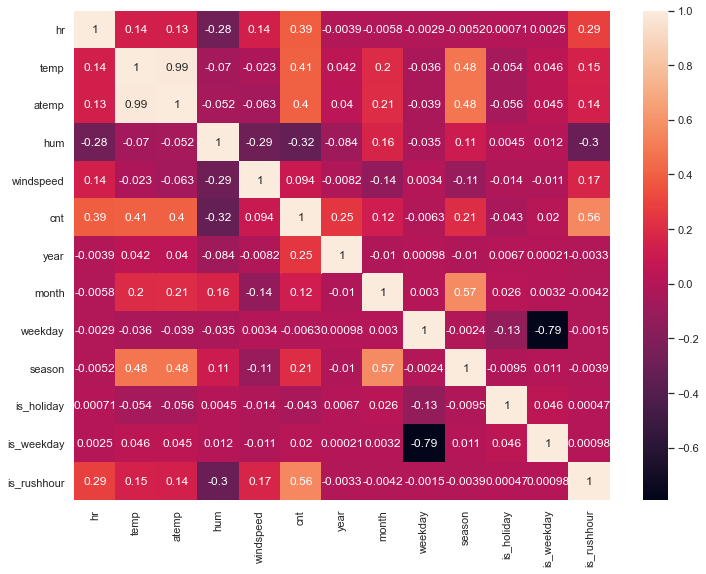

In [19]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), annot=True);

### 4.2 Summarizing weather conditions and rides by date, timeofday and weather situation

In [20]:
meanweather = df.groupby(['dteday','hr', 'weathersit'])['temp', 'atemp', 'hum', 'windspeed', 'cnt'].mean()
meanweather

temp  \
dteday     hr weathersit                                                 
2011-01-01 0  Clear, Few clouds, Partly cloudy, Partly cloudy     0.24   
           1  Clear, Few clouds, Partly cloudy, Partly cloudy     0.22   
           2  Clear, Few clouds, Partly cloudy, Partly cloudy     0.22   
           3  Clear, Few clouds, Partly cloudy, Partly cloudy     0.24   
           4  Clear, Few clouds, Partly cloudy, Partly cloudy     0.24   
...                                                                ...   
2012-12-31 19 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.26   
           20 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.26   
           21 Clear, Few clouds, Partly cloudy, Partly cloudy     0.26   
           22 Clear, Few clouds, Partly cloudy, Partly cloudy     0.26   
           23 Clear, Few clouds, Partly cloudy, Partly cloudy     0.26   

                                                                   atemp  \
dteday     hr weathersit                                                   
2011-01-01 0  Clear, Few clouds, Partly cloudy, Partly cloudy     0.2879   
           1  Clear, Few clouds, Partly cloudy, Partly cloudy     0.2727   
           2  Clear, Few clouds, Partly cloudy, Partly cloudy     0.2727   
           3  Clear, Few clouds, Partly cloudy, Partly cloudy     0.2879   
           4  Clear, Few clouds, Partly cloudy, Partly cloudy     0.2879   
...                                                                  ...   
2012-12-31 19 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.2576   
           20 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.2576   
           21 Clear, Few clouds, Partly cloudy, Partly cloudy     0.2576   
           22 Clear, Few clouds, Partly cloudy, Partly cloudy     0.2727   
           23 Clear, Few clouds, Partly cloudy, Partly cloudy     0.2727   

                                                                   hum  \
dteday     hr weathersit                                                 
2011-01-01 0  Clear, Few clouds, Partly cloudy, Partly cloudy     0.81   
           1  Clear, Few clouds, Partly cloudy, Partly cloudy     0.80   
           2  Clear, Few clouds, Partly cloudy, Partly cloudy     0.80   
           3  Clear, Few clouds, Partly cloudy, Partly cloudy     0.75   
           4  Clear, Few clouds, Partly cloudy, Partly cloudy     0.75   
...                                                                ...   
2012-12-31 19 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.60   
           20 Mist + Cloudy, Mist + Broken clouds, Mist + Few...  0.60   
           21 Clear, Few clouds, Partly cloudy, Partly cloudy     0.60   
           22 Clear, Few clouds, Partly cloudy, Partly cloudy     0.56   
           23 Clear, Few clouds, Partly cloudy, Partly cloudy     0.65   

                                                                  windspeed  \
dteday     hr weathersit                                                      
2011-01-01 0  Clear, Few clouds, Partly cloudy, Partly cloudy        0.0000   
           1  Clear, Few clouds, Partly cloudy, Partly cloudy        0.0000   
           2  Clear, Few clouds, Partly cloudy, Partly cloudy        0.0000   
           3  Clear, Few clouds, Partly cloudy, Partly cloudy        0.0000   
           4  Clear, Few clouds, Partly cloudy, Partly cloudy        0.0000   
...                                                                     ...   
2012-12-31 19 Mist + Cloudy, Mist + Broken clouds, Mist + Few...     0.1642   
           20 Mist + Cloudy, Mist + Broken clouds, Mist + Few...     0.1642   
           21 Clear, Few clouds, Partly cloudy, Partly cloudy        0.1642   
           22 Clear, Few clouds, Partly cloudy, Partly cloudy        0.1343   
           23 Clear, Few clouds, Partly cloudy, Partly cloudy        0.1343   

                                                                  cnt  
dteday     hr weathersit                           

### 4.3 Interactive Time-series
Show number of people in different hours on an interactive graph:

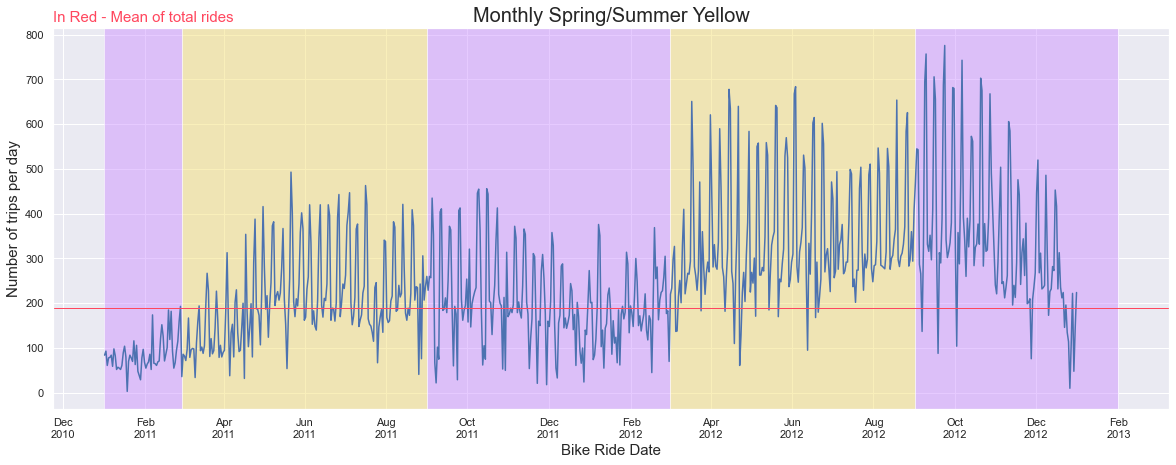

<function __main__.f(Hour)>

In [21]:
# prepare the data set
df_newdate = df.copy()
df_newdate['newdate'] = df_newdate["dteday"] + df_newdate['hr'].apply(np.ceil).\
                apply(lambda x:pd.Timedelta(x, unit = 'H'))
df_newdate = df_newdate.set_index('newdate')

# define the function
def f(Hour):
    # now we will create only one plot, but we can add more in the parameter
    fig, axes = plt.subplots(1,1, figsize=(20,7), sharex=True)
    
    plt.rcParams['axes.facecolor'] = 'white'
    filtro = 'hr =='+ str(Hour)
    df1 = df_newdate.query(filtro)
    df1["cnt"].plot(subplots=True)
    
    c_winter = '#cf96ff'
    c_summer = '#f5e077'

    # visualizing the 2 seasons areas in the plot
    recs2k_bgn = '2011-01-01'
    recs2k_end = '2011-03-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    recs2k_bgn = '2011-03-01'
    recs2k_end = '2011-09-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_summer, alpha=0.5)

    recs2k_bgn = '2011-09-01'
    recs2k_end = '2012-03-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    recs2k_bgn = '2012-03-01'
    recs2k_end = '2012-09-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_summer, alpha=0.5)

    recs2k_bgn = '2012-09-01'
    recs2k_end = '2013-02-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    plt.title('In Red - Mean of total rides', fontsize=15, color='#ff475e', loc='left')
    axes.axhline(df.mean(axis=0)["cnt" ] , color='#ff475e', linestyle='-', linewidth=1)
    
    # add titles
    axes.set_title('Monthly Spring/Summer Yellow', fontsize=20)
    
    # add axis labels
    axes.set_ylabel('Number of trips per day', fontsize=15)
    axes.set_xlabel('Bike Ride Date', fontsize=15)

    # update axis X tick labels
    loc = mdates.MonthLocator(interval=2)
    axes.xaxis.set_major_locator(loc)
    fmt = mdates.DateFormatter('%b\n%Y')
    axes.xaxis.set_major_formatter(fmt)

interactive_plot = interact(f, Hour=(1, 23))
interactive_plot

### 4.4 Ride count analysis
#### 4.4.1 Ride counts in relation to temp
Rides are highest when temprature is in the range of 0.4 to 0.8. Lowest rides can be observed when it's colder. 

Text(30.990633333333335, 0.5, 'Count of all Bikes Rented')

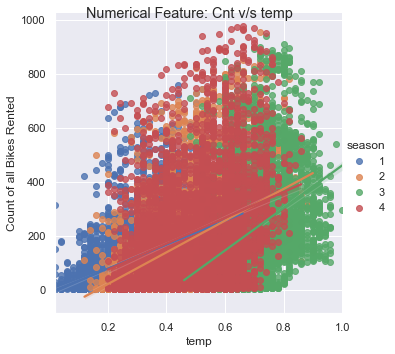

In [22]:
# reset the graph theme
sns.set()

sns.lmplot(x="temp", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Bikes Rented')

#### 4.4.2 Ride counts in relation to atemp
Unsurprisingly the very same can be observed for atemp. Rides are highest when temprature is in the range of 0.4 to 0.8. Lowest rides can be observed when it's colder. 

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

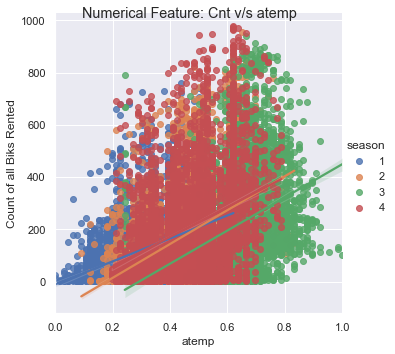

In [23]:
sns.lmplot(x="atemp", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

#### 4.4.3 Ride counts in relation to humidity
Humidity does not seem to have a massive impact on ride bookings. One would assume that humidity would affect the bike riding behavior more. 

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

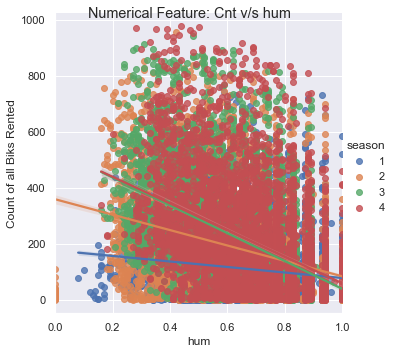

In [24]:
sns.lmplot(x="hum", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

#### 4.4.4 Ride counts in relation to windspeed
Rides are fewer when the windspeed is very high. Windspeed seems bearable when upto 0.4, as the windspeed increases beyond this point rides see a massive decline

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

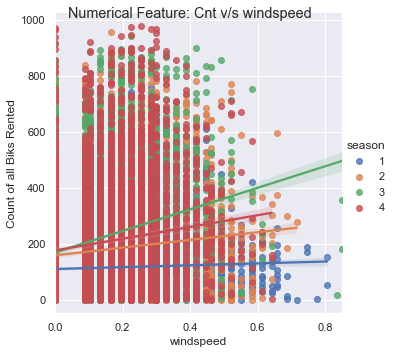

In [25]:
sns.lmplot(x="windspeed", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

#### 4.4.5 Ride counts by date 
Seasonality is observed as rides peak between May and October, as this is the summer time in the US. Furthermore, there is also a growth observed year on year. 

<AxesSubplot:xlabel='dteday'>

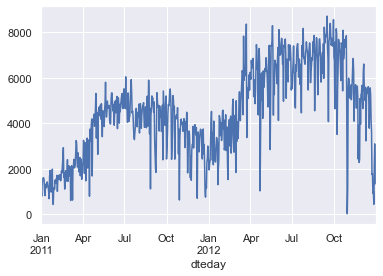

In [26]:
daily_rides = df.groupby(['dteday'])['cnt'].sum()
daily_rides.plot.line(x='dteday', y='cnt')

#### 4.4.6 Ride count seasonality
As previously discussed, one can see that surprisingly winter is amongst the two most rided season. This can be explained, with the increasing impact of global warming - shifting seasons slightly every year. Expectedly, by far the most rides are booked when the weather is clear

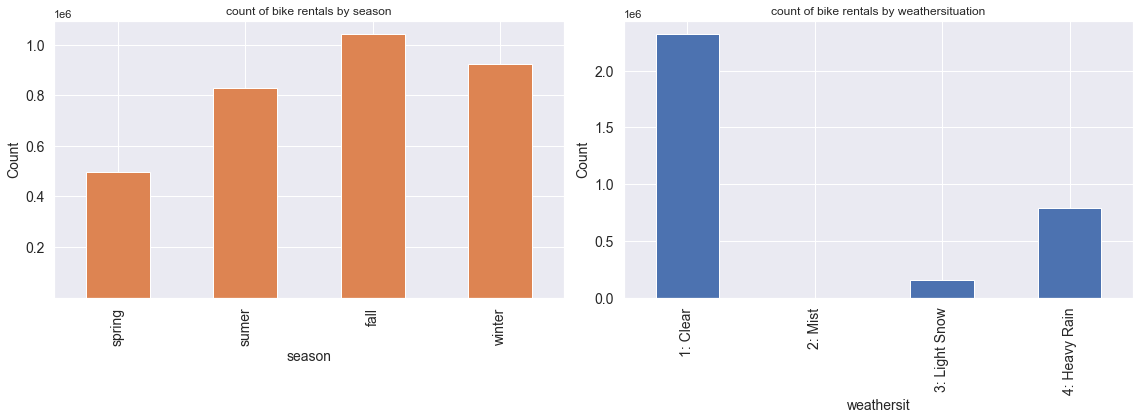

In [27]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) #Defining output layout

ax1 = df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar', 
                                       legend = False, title ="count of bike rentals by season", 
                                         stacked=True, fontsize=14, ax=ax1)#Chunk of code explains barplot1 parameters 
ax1.set_xlabel("season", fontsize=14) #Chart aesthetics and encoding
ax1.set_ylabel("Count", fontsize=14)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="count of bike rentals by weathersituation", fontsize=14, ax=ax2)#Chunk of code explains barplot1 parameters 

ax2.set_xlabel("weathersit", fontsize=14) #Chart aesthetics and encoding
ax2.set_ylabel("Count", fontsize=14)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

#### 4.4.7 Average rides by day of week
Thursday and Friday are the busiest days for bike sharing companies and it seems Sunday is the rest day. This has huge implications for business context, which can be discussed in a less technical report. However, one that can be mentioned is that ride sharing companies could offer discounts on the not so popular days, in order to decrease the usage of environmentally unfriendly vehicles and of course boost their own sales.

Text(0, 0.5, 'Ride Count')

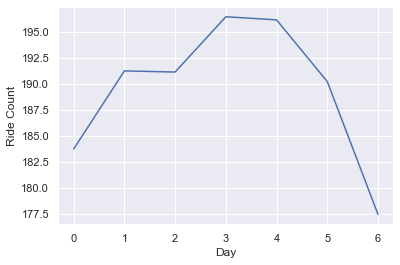

In [28]:
dayofweek_rides = df.groupby(['weekday'])['cnt'].mean()
dayofweek_rides.plot.line(x='weekday', y='cnt')

plt.xlabel('Day')
plt.ylabel("Ride Count")


#### 4.4.8 Average rides by time of day
This chart emphasises, the choise that was made for the rush hour variable. First peak hour is 08:00 and second peak is 17:00. Activity is busy between these peaks as well. Low activity between 23:00 and 05:00, can be observed.

Text(0, 0.5, 'Ride Count')

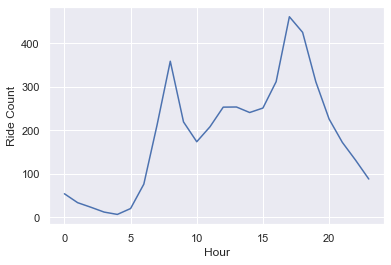

In [29]:
hourly_rides = df.groupby(['hr'])['cnt'].mean()
hourly_rides.plot.line(x='hr', y='cnt')

plt.xlabel('Hour')
plt.ylabel("Ride Count")

### 4.5 Weather analysis
#### 4.5.1 Boxplot for different measures of weather
Higher range in temp, atemp and humidity while windspeed has a lower variance and many outliers. This can be taken into consideration when strategies for specific weather conditions have to be elaborated. 

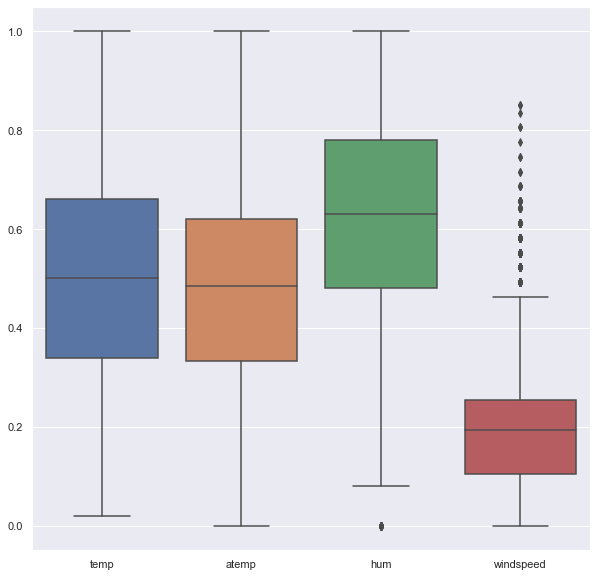

In [30]:
sns.boxplot(data=df[['temp',
       'atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

#### 4.5.2 Distributions of different measures of weather

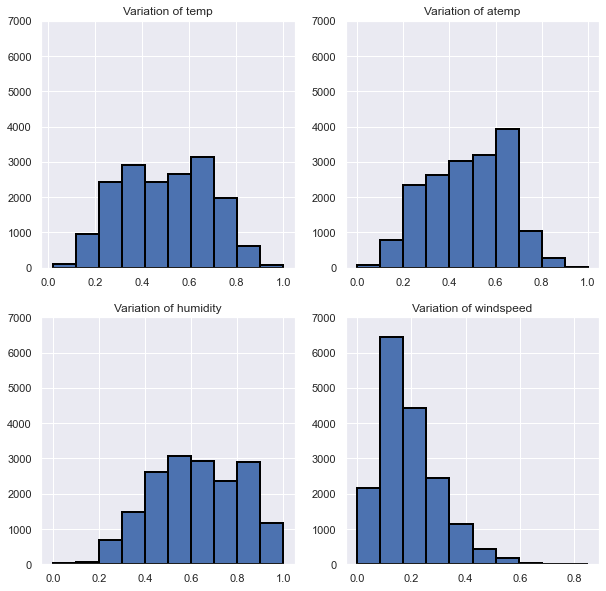

In [31]:
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2)
axes[0,0].set_title("Variation of temp")
axes[0,0].set_ylim([0, 7000]) #Fixing y axis so all graphs can be seen on the same scale
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2)
axes[0,1].set_title("Variation of atemp")
axes[0,1].set_ylim([0, 7000])
axes[1,0].hist(x="hum",data=df,edgecolor="black",linewidth=2)
axes[1,0].set_title("Variation of humidity")
axes[1,0].set_ylim([0, 7000])
axes[1,1].hist(x="windspeed",data=df,edgecolor="black",linewidth=2)
axes[1,1].set_title("Variation of windspeed")
axes[1,1].set_ylim([0, 7000])
fig.set_size_inches(10,10)

#### 4.5.3 Count of rides in different weather conditions
As seen in **4.4.6 Ride count seasonality**, one can see that good weather conditions have massive impact on ride counts.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear, Few clouds, Partly cloudy, Partly cloudy'),
  Text(1, 0, 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
  Text(2, 0, 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'),
  Text(3, 0, 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')])

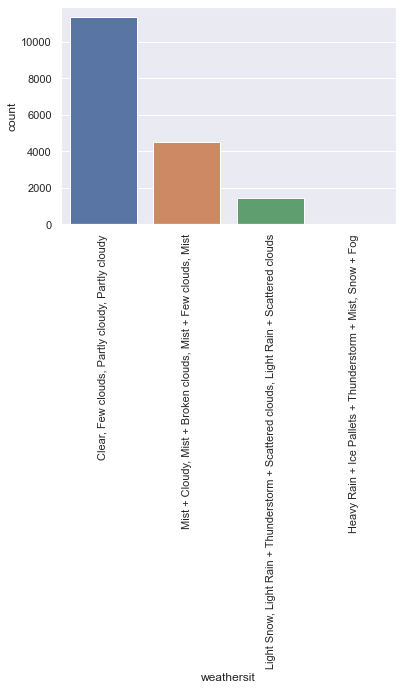

In [32]:
sns.countplot(data=df, x="weathersit")
plt.xticks(rotation=90)

## 5. ML Predictive Analytics

In [33]:
# defining target & feature columns:
X = df.drop(columns=['cnt'])
y = df[['cnt']]

In [34]:
# we are not allowed to use 2012 4th quarter for training our modals
X_train = X.loc[X['dteday']  < '2012-09-01']
X_test = X.loc[X['dteday']  >= '2012-09-01']
y_train = y.loc[X['dteday']  < '2012-09-01'] 
y_test = y.loc[X['dteday']  >= '2012-09-01']

In [35]:
X_train = X_train.drop(columns="dteday")
X_test = X_test.drop(columns="dteday")

In [36]:
print("Total variety of weather situations: \n {}".format(len(df['weathersit'].unique())))
print("----")
print("Different types of weather situations: \n {}".format(df['weathersit'].unique()))
print("----")
print("Weather situation distribution: \n {}".format(df['weathersit'].value_counts()))

Total variety of weather situations: 
 5
----
Different types of weather situations: 
 ['Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
 nan 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']
----
Weather situation distribution: 
 Clear, Few clouds, Partly cloudy, Partly cloudy                                            11345
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                4517
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     1414
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     3
Name: weathersit, dtype: int64


### 5.1 Imputing and preprocessing

In [37]:
preprocessing = ColumnTransformer([
    
    # median imputer 
    ("temp_imputer", KNNImputer(n_neighbors=2), ["temp"]),
    
    # round to 3 decimals 
    ("atemp_fill", Pipeline([
        ("atemp_imputer", SimpleImputer(strategy="median")),
        ("atemp_round_decimal", FunctionTransformer(lambda x: np.round(x, 3))),
    ]), ["atemp"]),
    
    # median imputer   
    ("hum_imputer", SimpleImputer(strategy="median"), ["hum"]),
    
    # median imputer
    ("wind_imputer", SimpleImputer(strategy="median"), ["windspeed"]),
    
    # fill with the most frequent and one hot encode the weathersit column
    ("weathersit_fill", Pipeline([
        ("weathersit_imputer", SimpleImputer(strategy='most_frequent')),
        ("weathersit_encode", OneHotEncoder()),
    ]), ["weathersit"]),
    
], remainder="passthrough")

In [38]:
# creating the pipeline
clf = Pipeline([
    ("preprocessing", preprocessing),
    ("pca", PCA()), # PCA before applying the linear regression
    ("regression", LinearRegression()) # start with linear regression but go deeper with other algorithms
])

In [39]:
# Displaying how the pre processing is constructed, stolen from Juan Carlos
set_config(display="diagram")
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('temp_imputer', KNNImputer(n_neighbors=2),
                                 ['temp']),
                                ('atemp_fill',
                                 Pipeline(steps=[('atemp_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('atemp_round_decimal',
                                                  FunctionTransformer(func=<function <lambda> at 0x7f8b91abb820>))]),
                                 ['atemp']),
                                ('hum_imputer',
                                 SimpleImputer(strategy='median'), ['hum']),
                                ('wind_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['windspeed']),
                                ('weathersit_fill',
                                 Pipeline(steps=[('weathersit_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('weathersit_encode',
                                                  OneHotEncoder())]),
                                 ['weathersit'])])

### 5.2 Tuning the model
We have changed our mind and we are not going to use PCA for analysis:

In [40]:
# remove the PCA component in the pipeline
clf.set_params(pca=None)
# set the regression None since we are going to use param_grid
clf.set_params(regression=None)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('temp_imputer',
                                                  KNNImputer(n_neighbors=2),
                                                  ['temp']),
                                                 ('atemp_fill',
                                                  Pipeline(steps=[('atemp_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('atemp_round_decimal',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f8b91abb820>))]),
                                                  ['atemp']),
                                                 ('hum_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['hum']),
                                                 ('wind_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['windspeed']),
                                                 ('weathersit_fill',
                                                  Pipeline(steps=[('weathersit_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('weathersit_encode',
                                                                   OneHotEncoder())]),
                                                  ['weathersit'])])),
                ('pca', None), ('regression', None)])

In [41]:
# creating the list of algorithms and hyperparameters to try:
# we reduced the number of test hyperparameters to reduce execution time of the notebook: "tried" hyperparameters
param_grid = [
    {
        "regression": [LinearRegression()],
        "regression__normalize": [False], # True tried
    },
    {
        "regression": [DecisionTreeRegressor()], 
        "regression__max_depth": [10], # 5 tried
        "regression__random_state": [seed],
    },
    {
        "regression": [RandomForestRegressor()],
        "regression__random_state": [seed],
        "regression__max_depth": [10],  # 5 tried
        "regression__n_estimators": [30],  # 50 tried
        "regression__max_features": [0.7]  # 0.8 tried
    }
]

#### 5.2.1 Cross validation
Cross validating the model, to have different outcomes to be compared:

In [42]:
clf = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10, scoring="r2")

### 5.3 Obtaining accurate predictions
Fitting the model to obtain accurate predictions and making sure, this report can help bike sharing companies for future stragies.

In [43]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('temp_imputer',
                                                                         KNNImputer(n_neighbors=2),
                                                                         ['temp']),
                                                                        ('atemp_fill',
                                                                         Pipeline(steps=[('atemp_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('atemp_round_decimal',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7f8b91abb820>))]),
                                                                         ['atemp']),
                                                                        (...
                          'regression__normalize': [False]},
                         {'regression': [DecisionTreeRegressor()],
                          'regression__max_depth': [10],
                          'regression__random_state': [120]},
                         {'regression': [RandomForestRegressor(max_depth=10,
                                                               max_features=0.7,
                                                               n_estimators=30,
                                                               random_state=120)],
                          'regression__max_depth': [10],
                          'regression__max_features': [0.7],
                          'regression__n_estimators': [30],
                          'regression__random_state': [120]}],
             scoring='r2')

In [44]:
# listing the best parameters for the param_grid:
clf.best_params_

{'regression': RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=30,
                       random_state=120),
 'regression__max_depth': 10,
 'regression__max_features': 0.7,
 'regression__n_estimators': 30,
 'regression__random_state': 120}

In [45]:
# get the best score
clf.best_score_

0.7644710037116105

In [46]:
# list all the scores of different models
test_scores = clf.cv_results_['mean_test_score']
test_scores

array([0.28347501, 0.62687692, 0.764471  ])

#### 5.3.1 Choossing the best model to predict
It was experimented with a lot of algorithms and hyperparameters. The best r2 score can be obtained above.

In [47]:
# get the model with the best estimator
clf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('temp_imputer',
                                                  KNNImputer(n_neighbors=2),
                                                  ['temp']),
                                                 ('atemp_fill',
                                                  Pipeline(steps=[('atemp_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('atemp_round_decimal',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7f8b91abb820>))]),
                                                  ['atemp']),
                                                 ('hum_imputer',
                                                  SimpleImputer(s...an'),
                                                  ['hum']),
                                                 ('wind_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['windspeed']),
                                                 ('weathersit_fill',
                                                  Pipeline(steps=[('weathersit_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('weathersit_encode',
                                                                   OneHotEncoder())]),
                                                  ['weathersit'])])),
                ('pca', None),
                ('regression',
                 RandomForestRegressor(max_depth=10, max_features=0.7,
                                       n_estimators=30, random_state=120))])

In [48]:
# retrieve all performance metrics
results = clf.cv_results_
results

{'mean_fit_time': array([2.06213038, 2.1807761 , 2.93489807]),
 'std_fit_time': array([0.10744444, 0.12388566, 0.97249275]),
 'mean_score_time': array([0.06586735, 0.11318045, 0.06537869]),
 'std_score_time': array([0.02278768, 0.04964098, 0.01645065]),
 'param_regression': masked_array(data=[LinearRegression(), DecisionTreeRegressor(),
                    RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=30,
                       random_state=120)],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_regression__normalize': masked_array(data=[False, --, --],
              mask=[False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_regression__max_depth': masked_array(data=[--, 10, 10],
              mask=[ True, False, False],
        fill_value='?',
             dtype=object),
 'param_regression__random_state': masked_array(data=[--, 120, 120],
              mask=[ True, False, False],
   

In [49]:
# test manually using the developed test set:
clf.best_estimator_.score(X_test, y_test)

0.8475420955599111

In [50]:
# let's use the test set to create predictions
predictions = clf.best_estimator_.predict(X_test)

In [51]:
# calculating the r2 score manually
r2_score(y_test, predictions)

0.8475420955599111

#### 5.4 Create a graph for actual values and predictions comparison:

Create a data frame that includes both predictions and actual people counts:

In [52]:
comparison_df = y_test[['cnt']]

In [53]:
comparison_df['predictions'] = predictions
comparison_df

,cnt,predictions
instant,,
14492,168,163.499226
14493,79,102.597309
14494,69,81.256314
14495,35,34.690581
14496,12,12.490075
...,...,...
17375,119,245.234742
17376,89,132.972736
17377,90,105.508641


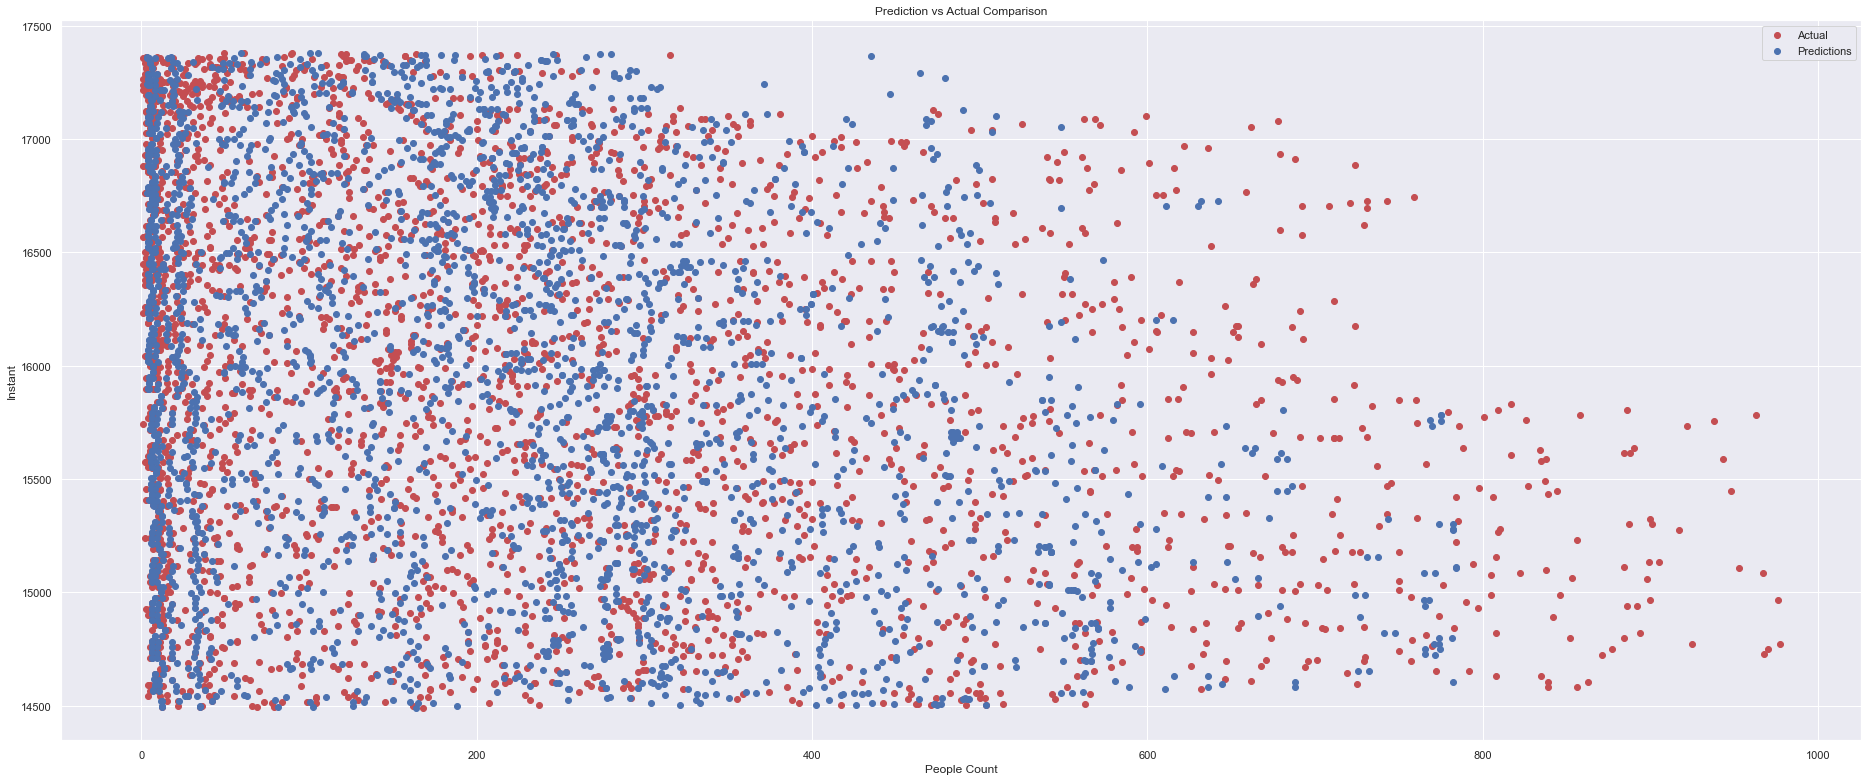

In [54]:
actual_scatter = comparison_df["cnt"]
prediction_scatter = comparison_df["predictions"]
instance_range = comparison_df.index
fig=plt.figure()

# change the size of plots
fig.set_size_inches(25, 10, forward=True)
ax=fig.add_axes([0,0,1,1])
ax.scatter(actual_scatter, instance_range, color='r', label="Actual")
ax.scatter(prediction_scatter, instance_range, color='b', label="Predictions")
ax.set_xlabel('People Count')
ax.set_ylabel('Instant')
ax.set_title('Prediction vs Actual Comparison')

plt.legend()
plt.show()

We selected one month to get the visual predictions, since the hour data becomes to cluttered for more months

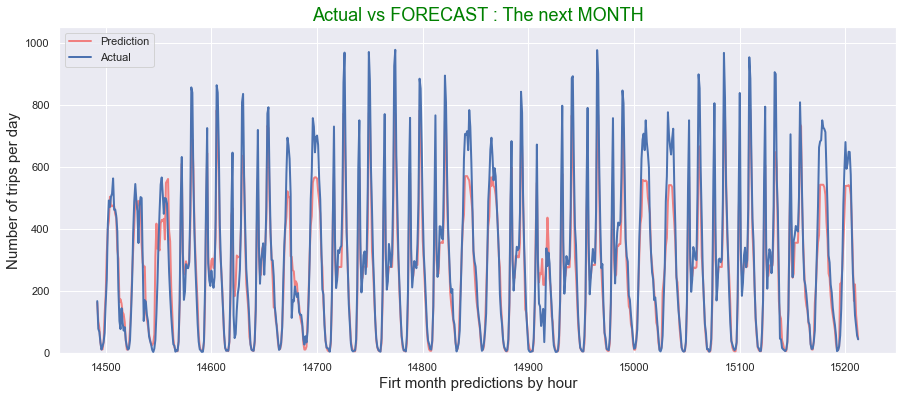

<function __main__.f(Prediction_Only)>

In [55]:
from ipywidgets import interact
import matplotlib.pyplot as plt

# potentially to show more subplots
def f(Prediction_Only):
    fig, axes = plt.subplots(1,1, figsize=(20,7), sharex=True)
    axes.set_ylabel('Number of trips per day', fontsize=15)
    axes.set_title('Actual vs FORECAST : The next MONTH', fontsize=18, color = "green") 


    if Prediction_Only:
        axes.set_ylim([0, 1050])
        prediction_scatter.head(721).plot(figsize=(15, 6), color='lightcoral', linewidth=2)
        actual_scatter.head(721).plot(figsize=(15, 6), linewidth=2)
        axes.set_xlabel('Firt month predictions by hour', fontsize=15)
        axes.legend(['Prediction', 'Actual'], loc='upper left', fontsize=11, frameon=True) 
    else:
        axes.set_ylim([0, 1050])
        prediction_scatter.head(721).plot(figsize=(15, 6), color='lightcoral', linewidth=2)
        axes.set_xlabel('Firt month predictions by hour', fontsize=15)
        axes.legend(['Prediction'], loc='upper left', fontsize=11, frameon=True) 

interact(f, Prediction_Only=True)

### 5.5 Plotting Validation Results


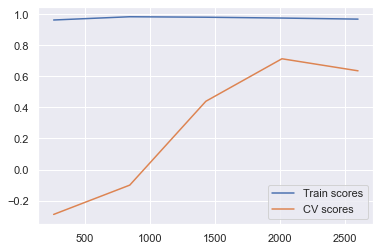

In [56]:
# determines cross-validated training and test scores for different training set sizes.
# .values will give the values in an array. (shape: (n,1) and .ravel will convert that array shape to (n, )
train_sizes, train_scores, cv_scores = learning_curve(clf.best_estimator_, X_test, y_test.values.ravel(), cv=10)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train scores")
plt.plot(train_sizes, cv_scores.mean(axis=1), label="CV scores")

plt.legend()

In [57]:
len(X_test)

2888

We get the best score around 0.3 split in the test dataset:

In [58]:
round(2000/2888, 2)

0.69

## 6. Conclusion
One can conclude, that this report can definitely be beneficial for US bike sharing companies in the future. This analysis can also be used as the foundation for other data sets, for instance bike sharing in Europe. Further, when one has the information on weather conditions, one could understand the ride sharing behavior of the average bike sharer in the US. Since many ideas originate in the US and then take ie. Europe by storm, this analysis can be helpful for other European bike sharing companies, understanding customer behaviors.

On another note, with a prediction score of 0.7644710037116105, given the similar information is provided as in this report, people count and potentially bicycle demand can be predicted for these companies. Especially US bike sharing companies will be able to use this report to analyse their customer behaviors and find margins for improvements.